In [1]:
!pip install haversine
!pip install utm

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
  Created wheel for utm: filename=utm-0.6.0-py3-none-any.whl size=6093 sha256=4bab6cdc2d94779d53d7757c52c90b56cf62affc9f042a2d99f6f3f0b98307d9
  Stored in directory: /home/ec2-user/.cache/pip/wheels/d7/c1/52/5667edfafc8e44623ca4f2d5a4a059f8252d678c0faa22c9de
Successfully built utm
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
from haversine import haversine
import utm
import math
import itertools
possibleLocations_data = pd.read_csv('./tp1_facility.csv')
cardiacArrest_data = pd.read_csv('./tp1_ohca.csv')

In [3]:
class Facility:
    def __init__(self, lat, long):
        self.lat = lat
        self.long = long
    

    def getLatLong(self):
        return (self.lat,self.long)

In [4]:
class Demand:
    def __init__(self,lat,long):
        self.lat = lat
        self.long = long
        self.setOfCandidateCoverDemand = set()

    def getLatLong(self):
        return (self.lat,self.long)

    def updateSetOfCandidateCoverDemand(self, candidateLocation):
        self.setOfCandidateCoverDemand.add(candidateLocation)



In [5]:
from math import sqrt, pow
from utm import from_latlon

#Di
maxAcceptableDistance = 2

#P
numberOfCandidateLocations = 20

#Dij
def getTravelDistance(candidate, demand): 
    candidateDistance = from_latlon(candidate.lat, candidate.long)
    demandDistance = from_latlon(demand.lat, demand.long)
    totalDistance = sqrt(pow(abs(candidateDistance[0]-demandDistance[0]), 2) + pow(abs(candidateDistance[1]-demandDistance[1]), 2)) / 500
    return totalDistance
  # return haversine(candidate.getLatLong(), demand.getLatLong())

#Wi


In [6]:

#I
setOfDemandPoints = set()
for index,location in cardiacArrest_data.iterrows():
    setOfDemandPoints.add(Demand(location['Lat'],location['Lon']))

#J
setOfCandidateLocations = set()
for index,location in possibleLocations_data.iterrows():
    setOfCandidateLocations.add(Facility(location['Lat'],location['Lon']))
    
#N
setOfPossibleCandidates = set()
for candidate in setOfCandidateLocations:
    for demand in setOfDemandPoints:
        if getTravelDistance(candidate, demand) < maxAcceptableDistance:
            demand.updateSetOfCandidateCoverDemand(candidate)
            setOfPossibleCandidates.add(candidate)

print(setOfPossibleCandidates)

{<__main__.Facility object at 0x7f769a8e3048>, <__main__.Facility object at 0x7f769a8e0898>, <__main__.Facility object at 0x7f769a8e00b8>, <__main__.Facility object at 0x7f769a8e08d0>, <__main__.Facility object at 0x7f769a8e3198>, <__main__.Facility object at 0x7f769a8e0198>, <__main__.Facility object at 0x7f769a8e31d0>, <__main__.Facility object at 0x7f769a8e01d0>, <__main__.Facility object at 0x7f769a8e09e8>, <__main__.Facility object at 0x7f769a8e0a20>, <__main__.Facility object at 0x7f769a8e0320>, <__main__.Facility object at 0x7f769a8e03c8>, <__main__.Facility object at 0x7f769a8e0be0>, <__main__.Facility object at 0x7f769a8e0c50>, <__main__.Facility object at 0x7f769a8e0c88>, <__main__.Facility object at 0x7f769a8e0cc0>, <__main__.Facility object at 0x7f769a8e0550>, <__main__.Facility object at 0x7f769a8e05c0>, <__main__.Facility object at 0x7f769a8e0630>, <__main__.Facility object at 0x7f769a8e0e48>, <__main__.Facility object at 0x7f769a8e06a0>, <__main__.Facility object at 0x7f

In [7]:
#If demand point is covered, Decision Variable Z = 1
#Sum of Zi(1/0) * Wi(number of demand at the facility)
from timeit import default_timer as timer  

start = timer()

setOfMaximisedCoverDemand = set()
currentMaximisedDemand = 0
sumOfZandW = 0

if len(setOfPossibleCandidates) < numberOfCandidateLocations:
    numberOfCandidateLocations = len(setOfPossibleCandidates)
    
for setOfCandidates in itertools.combinations(setOfPossibleCandidates, numberOfCandidateLocations):   
    for demand in setOfDemandPoints:
        for candidate in setOfCandidates:
            if candidate in demand.setOfCandidateCoverDemand:
                sumOfZandW = sumOfZandW + 1
        
    if sumOfZandW != 0:
        if sumOfZandW > currentMaximisedDemand:
            currentMaximisedDemand = sumOfZandW
            setOfMaximisedCoverDemand.clear()
            setOfMaximisedCoverDemand.add(setOfCandidates)
        elif sumOfZandW == currentMaximisedDemand:
            setOfMaximisedCoverDemand.add(setOfCandidates)
        sumOfZandW=0
        
print("Objective Value:", currentMaximisedDemand)
print("Solution Time:", timer()-start)

Objective Value: 24
Solution Time: 34.363949580999986


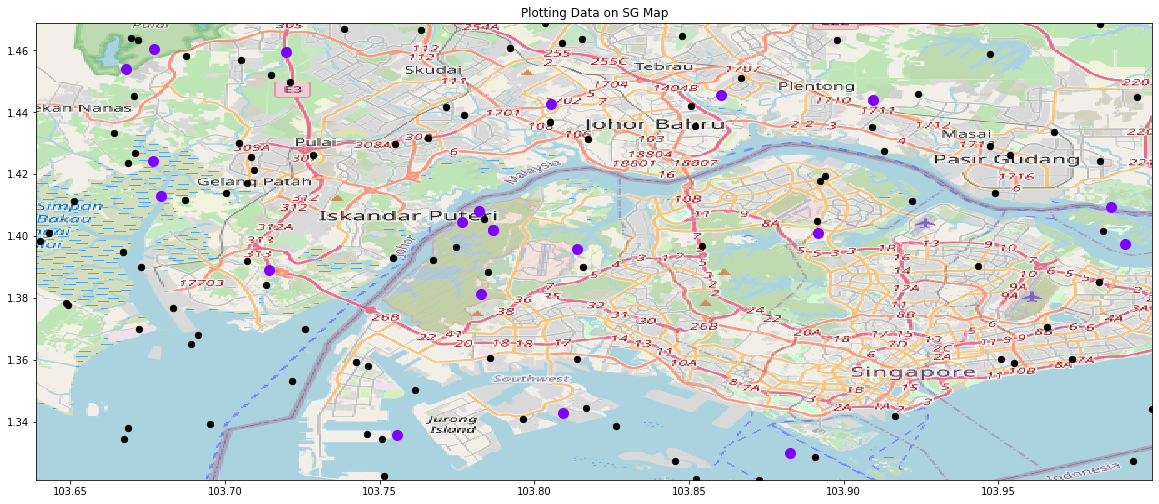

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

BBox = ((possibleLocations_data.Lon.min(),cardiacArrest_data.Lon.max(),
         cardiacArrest_data.Lat.min(), cardiacArrest_data.Lat.max()))
    
ruh_m = plt.imread('./tp_1map.png')

colors = cm.rainbow(np.linspace(0, 1, len(setOfMaximisedCoverDemand)))
fig, ax = plt.subplots(figsize = (20,20))
for facilities, c in zip(setOfMaximisedCoverDemand, colors):
    for facility in facilities:
        ax.scatter(facility.long, facility.lat, zorder=1, alpha=1.0, color=c, s=100)
    break

ax.scatter(facility.long, facility.lat, zorder=1, alpha=1.0, color=c, s=100)
ax.scatter(cardiacArrest_data.Lon, cardiacArrest_data.Lat, zorder=1, alpha=1.0, c='black', s=40)
# ax.scatter(possibleLocations_data.Lon, possibleLocations_data.Lat, zorder=1, alpha=1.0, c='r', s=10)
ax.set_title('Plotting Data on SG Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')




